In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [22]:
dataset = pd.read_csv("E:\Data_Analytics\\IPL_Data.csv")

In [3]:
print(dataset.tail(2))

      id  season       city        date                team1  \
575  576    2016      Delhi  2016-05-27        Gujarat Lions   
576  577    2016  Bangalore  2016-05-29  Sunrisers Hyderabad   

                           team2          toss_winner toss_decision  result  \
575          Sunrisers Hyderabad  Sunrisers Hyderabad         field  normal   
576  Royal Challengers Bangalore  Sunrisers Hyderabad           bat  normal   

     dl_applied               winner  win_by_runs  win_by_wickets  \
575           0  Sunrisers Hyderabad            0               4   
576           0  Sunrisers Hyderabad            8               0   

    player_of_match                  venue          umpire1       umpire2  \
575       DA Warner       Feroz Shah Kotla        M Erasmus     CK Nandan   
576     BCJ Cutting  M Chinnaswamy Stadium  HDPK Dharmasena  BNJ Oxenford   

     umpire3  
575      NaN  
576      NaN  


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               577 non-null    int64  
 1   season           577 non-null    int64  
 2   city             570 non-null    object 
 3   date             577 non-null    object 
 4   team1            577 non-null    object 
 5   team2            577 non-null    object 
 6   toss_winner      577 non-null    object 
 7   toss_decision    577 non-null    object 
 8   result           577 non-null    object 
 9   dl_applied       577 non-null    int64  
 10  winner           574 non-null    object 
 11  win_by_runs      577 non-null    int64  
 12  win_by_wickets   577 non-null    int64  
 13  player_of_match  574 non-null    object 
 14  venue            577 non-null    object 
 15  umpire1          577 non-null    object 
 16  umpire2          577 non-null    object 
 17  umpire3         

In [4]:
# It will describe numerical data
dataset.describe() 

,id,season,dl_applied,win_by_runs,win_by_wickets,umpire3
count,577.000000,577.000000,577.000000,577.000000,577.000000,0.0
mean,289.000000,2012.029463,0.025997,13.715771,3.363951,NaN
std,166.709828,2.486247,0.159263,23.619282,3.416049,NaN
min,1.000000,2008.000000,0.000000,0.000000,0.000000,NaN
25%,145.000000,2010.000000,0.000000,0.000000,0.000000,NaN
50%,289.000000,2012.000000,0.000000,0.000000,3.000000,NaN
75%,433.000000,2014.000000,0.000000,20.000000,6.000000,NaN
max,577.000000,2016.000000,1.000000,144.000000,10.000000,NaN


In [5]:
dataset.shape # It will show the number of coulumns and rows of tables

(577, 18)

In [6]:
dataset.isnull().sum() # it shows count of null values as per columns

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              0
umpire2              0
umpire3            577
dtype: int64

In [7]:
dataset.dropna(inplace=True)   # Removes rows with null values 
dataset.dropna(axis=1,inplace=True) # Removes coulumns with null values

In [8]:
dataset.isnull().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
umpire3            0
dtype: int64

In [9]:
print(dataset.head(2))

Empty DataFrame
Columns: [id, season, city, date, team1, team2, toss_winner, toss_decision, result, dl_applied, winner, win_by_runs, win_by_wickets, player_of_match, venue, umpire1, umpire2, umpire3]
Index: []


In [10]:
# This will corrects the data format in existing table 
datatset = pd.to_datetime(dataset['date'])

In [6]:
# It will revert the total number of winns by each team
dataset['winner'].value_counts().head(10)

winner
Mumbai Indians                 80
Chennai Super Kings            79
Royal Challengers Bangalore    70
Kolkata Knight Riders          68
Rajasthan Royals               63
Kings XI Punjab                63
Delhi Daredevils               56
Sunrisers Hyderabad            34
Deccan Chargers                29
Pune Warriors                  12
Name: count, dtype: int64

In [11]:
# Most successful temas ( based on win percentage )
team_wins = dataset['winner'].value_counts()
total_matches = dataset['team1'].value_counts() + dataset['team2'].value_counts()
win_percentage = (team_wins / total_matches) * 100
print(win_percentage.sort_values(ascending=False))

Series([], Name: count, dtype: float64)


In [11]:
# It will revert Unique teams and numbers of players of match
print(dataset['team1'].unique())
print(dataset['player_of_match'].value_counts())

['Kolkata Knight Riders' 'Chennai Super Kings' 'Rajasthan Royals'
 'Mumbai Indians' 'Deccan Chargers' 'Kings XI Punjab'
 'Royal Challengers Bangalore' 'Delhi Daredevils' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Sunrisers Hyderabad' 'Rising Pune Supergiants'
 'Gujarat Lions']
player_of_match
CH Gayle          17
YK Pathan         16
AB de Villiers    15
DA Warner         14
RG Sharma         13
                  ..
CR Brathwaite      1
RR Pant            1
A Zampa            1
HM Amla            1
BCJ Cutting        1
Name: count, Length: 187, dtype: int64


In [12]:
# Reverts Player of match of 10 players
dataset['player_of_match'].value_counts().head(10)

Series([], Name: count, dtype: int64)

In [13]:
# It will revert for all duplicated rows stating in True or false
dataset.duplicated().sum

<bound method Series.sum of 0      False
1      False
2      False
3      False
4      False
       ...  
572    False
573    False
574    False
575    False
576    False
Length: 577, dtype: bool>

In [13]:
# Gives very existing column from whole table
dataset.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [14]:
# Removing unused column from data that is umpire3.
dataset = dataset.drop(['umpire3'],axis=1)

In [21]:
# It gives all columns present in the dataset
dataset.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2'],
      dtype='object')

In [15]:
# gives detailes information about column city
print(dataset['city'].describe())

count       0
unique      0
top       NaN
freq      NaN
Name: city, dtype: object


In [16]:
# It will gives unique users and items in the dataset.
print(dataset.nunique())

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
dtype: int64


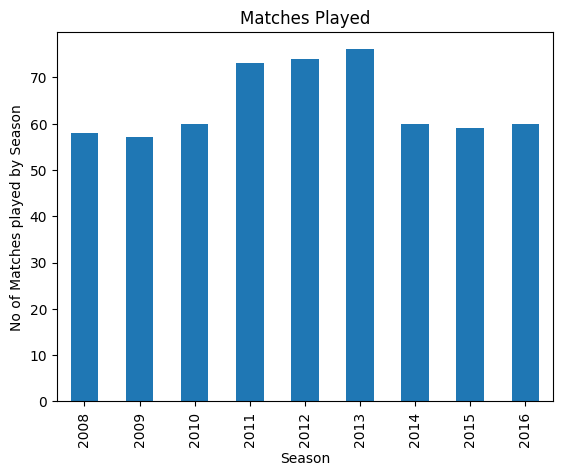

In [23]:
#It will shows the no of matches played by each season
dataset.groupby('season')['id'].count().plot(kind='bar',title='Matches Played') 
# Showing status by graph
plt.xlabel('Season')
plt.ylabel('No of Matches played by Season')
plt.show()

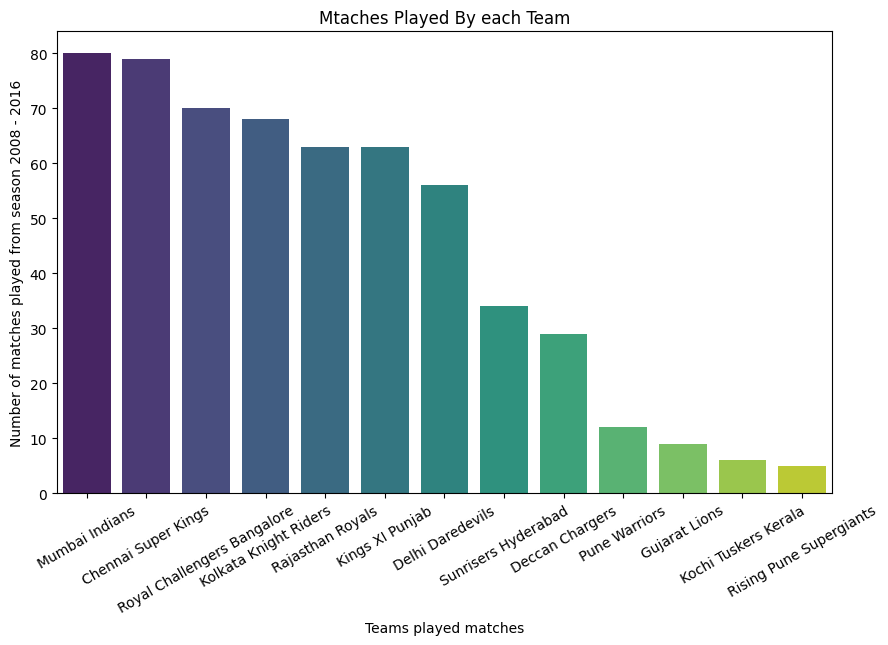

In [24]:
# This graph will calculate that number of matches played by a teams in all seasons from 2008 to 2016
win_counts = dataset['winner'].value_counts().reset_index()
win_counts.columns = ["Team", "Titles"]
# Plotting the result
plt.figure(figsize=(10,6))
sns.barplot(data = win_counts, x="Team", y="Titles",hue="Team",palette="viridis",legend=False)
plt.xlabel("Teams played matches")
plt.ylabel("Number of matches played from season 2008 - 2016")
plt.title("Mtaches Played By each Team")
plt.xticks(rotation=30)
plt.show()

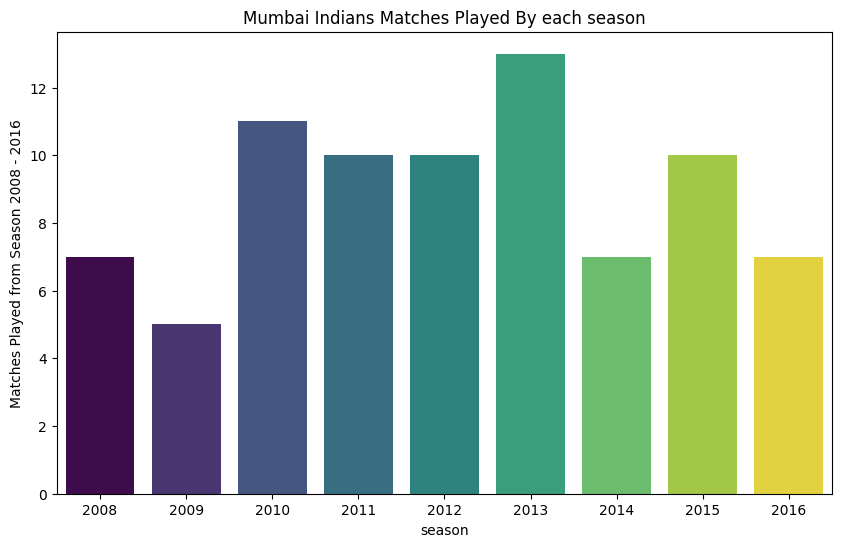

In [25]:
# This line will filters macthes won by Mumbai Indians
mi_wins = dataset[dataset["winner"] == "Mumbai Indians"]
#Counts wins per season
mi_wins_per_Season = mi_wins.groupby("season")["winner"].count().reset_index()
mi_wins_per_Season.columns = ["season","Wins"]
#Plotting the results
plt.figure(figsize=(10,6))
sns.barplot(data=mi_wins_per_Season, x="season",y="Wins", hue="season",palette="viridis",legend=False)
plt.xlabel("season")
plt.ylabel("Matches Played from Season 2008 - 2016")
plt.title("Mumbai Indians Matches Played By each season")
# plt.xticks(rotation=30)
plt.show()